Trabalho 2 - Unidade 3
==
# Tema: Distribuições contínuas e Análise de confiabilidade

## Alunos: 
**Analla Nayane de Farias Cunha**

**João Vitor Deon**

## Descrição: 
**Realizar um estudo com diferentes configurações de redundância (TMR, 5MR, paralela com 2,3,4 dispositivos), valores de lambda. 
Identificar no estudo os valores temporais que a partir deles não se justifica o uso de redundância. Para cada cenário traçar linhas verticais indicando o MTTF de cada modelo de redundância.**

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.misc import comb 
from scipy.stats import expon
from math import exp

In [2]:
#confiabilidade exponencial
def conf_exp(v, lamb):
    return [math.pow(math.e, (-lamb * t)) for t in v]

In [3]:
#confiabilidade hypoexponencial -------> R(t) = 1 - F(t)
def conf_hypoexp(v,lamb1,lamb2):
    return [(lamb2/(lamb2-lamb1))*math.pow(math.e,(-lamb1*t)) - (lamb1/(lamb2-lamb1))*math.pow(math.e,(-lamb2*t)) for t in v ]

In [4]:
#XMR para TMR(3MR e 5MR)
def XMR(v, n):
    lista=[]
    for t in v:
        xmr = [( comb(n,i) * math.pow(t,i) * math.pow((1-t),(n-i)) ) for i in np.arange(2,n+1) ]
        somatorio = np.sum(xmr)
        lista.append(somatorio)
    return lista

In [5]:
#paralela recebe lista de confs e o numero n de dispositivos
def paralela(v, n):
    return [(1-math.pow(1-r , n) )for r in v ]
    

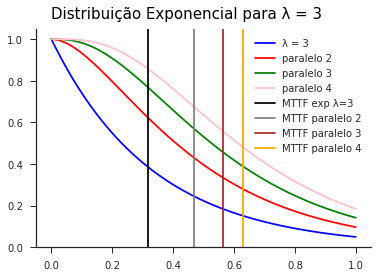

In [112]:
# #plotagem do grafico distribuição exponencial para lambda = 3

sns.set()
sns.set_style("ticks")

x = np.linspace(0, 1, 100)

plt.plot(x, conf_exp(x,3) ,label='λ = 3',color='blue')
plt.plot(x, paralela(conf_exp(x,3),2), label='paralelo 2', color='red')
plt.plot(x, paralela(conf_exp(x,3),3), label='paralelo 3', color='green')
plt.plot(x, paralela(conf_exp(x,3),4), label='paralelo 4', color='pink')

plt.axvline(x=np.mean( conf_exp(x,3) ), label='MTTF exp λ=3', color='black')
plt.axvline(x=np.mean( paralela(conf_exp(x,3),2) ), label='MTTF paralelo 2', color='grey')
plt.axvline(x=np.mean( paralela(conf_exp(x,3),3) ), label='MTTF paralelo 3', color='brown')
plt.axvline(x=np.mean( paralela(conf_exp(x,3),4) ), label='MTTF paralelo 4', color='orange')

plt.text(0, 1.1,'Distribuição Exponencial para λ = 3', color='black', size=15)
plt.legend(loc=0)
sns.despine()
plt.show()
plt.close()

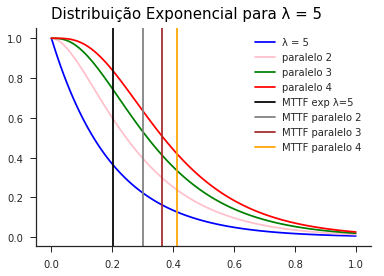

In [119]:
#plotagem do grafico distribuição exponencial para lambda = 5
sns.set()
sns.set_style("ticks")

x = np.linspace(0, 1, 100)

plt.plot(x, conf_exp(x,5) ,label='λ = 5', color='blue')
plt.plot(x, paralela(conf_exp(x,5),2), label='paralelo 2', color='pink')
plt.plot(x, paralela(conf_exp(x,5),3), label='paralelo 3', color='green')
plt.plot(x, paralela(conf_exp(x,5),4), label='paralelo 4', color='red')

plt.axvline(x=np.mean( conf_exp(x,5) ), label='MTTF exp λ=5', color='black')
plt.axvline(x=np.mean( paralela(conf_exp(x,5),2) ), label='MTTF paralelo 2', color='grey')
plt.axvline(x=np.mean( paralela(conf_exp(x,5),3) ), label='MTTF paralelo 3', color='brown')
plt.axvline(x=np.mean( paralela(conf_exp(x,5),4) ), label='MTTF paralelo 4', color='orange')

plt.text(0, 1.1,'Distribuição Exponencial para λ = 5', color='black', size=15)
plt.legend(loc=0)
sns.despine()
plt.show()
plt.close()

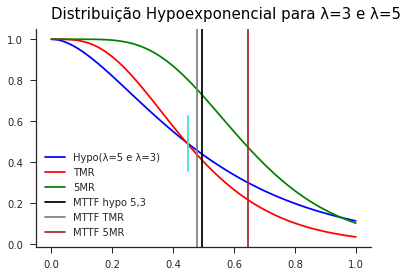

In [116]:
#plotagem do grafico distribuição hypoexponencial,TMR, e 5MR para lambda = 5 e lambda = 3
sns.set()
sns.set_style("ticks")

x = np.linspace(0, 1, 100)

plt.plot(x, conf_hypoexp(x,3,5) ,label='Hypo(λ=5 e λ=3)', color='blue')
plt.plot(x, XMR(conf_hypoexp(x,3,5),3) ,label='TMR', color='red')
plt.plot(x, XMR(conf_hypoexp(x,3,5),5) ,label='5MR', color='green')

plt.axvline(x=np.mean( conf_hypoexp(x,3,5) ), label='MTTF hypo 5,3', color='black')
plt.axvline(x=np.mean( XMR(conf_hypoexp(x,3,5),3) ), label='MTTF TMR', color='grey')
plt.axvline(x=np.mean( XMR(conf_hypoexp(x,3,5),5) ), label='MTTF 5MR', color='brown')
plt.axvline(x=0.45, ymin=0.35, ymax=0.6 , color='turquoise')

plt.text(0, 1.1,'Distribuição Hypoexponencial para λ=3 e λ=5', color='black', size=15)
plt.legend(loc=0)
sns.despine()
plt.show()
plt.close()